In [234]:
import pandas as pd

In [235]:
import pandas as pd

file_path = "SA - Data for Task 2 (1).xlsx"

work_order_df = pd.read_excel(file_path, sheet_name="Work Order Data")



In [236]:
work_order_df[:5]

,Primary Key,Order No,Segment Number,Order Date,Manufacturer,Model,Product Category,Model Year,Serial Number,Meter 1 Reading,Complaint,Cause,Correction,Failure Condition - Failure Component,Fix Condition - Fix Component
0,SO0005588-1,SO0005588,1,2022-04-30,PASEIH,6780,APPL,0,YFT042399,2531.0999,"No cab heat, temp gauge dont get to operating ...",NaN,"Als ich das Gerät in die Werkstatt fuhr, stieg...","No Heat - Cab, Not Achieving - Gauge",No Component Mentioned - Added
1,SO0005907-1,SO0005907,1,2022-04-30,PASEIH,6780,APPL,0,YFT042399,2531.0999,"No cab heat, temp gauge dont get to operating ...",NaN,"Als ich das Gerät in die Werkstatt fuhr, stieg...","No Heat - Cab, Not Achieving - Gauge",No Component Mentioned - Added
2,SO0006100-1,SO0006100,1,2022-04-30,PASEIH,6780,APPL,0,YFT042399,2531.0999,"No cab heat, temp gauge dont get to operating ...",NaN,"Als ich das Gerät in die Werkstatt fuhr, stieg...",Not Charging - Alternator,No Component Mentioned - No Component Mentioned
3,SO0006642-1,SO0006642,1,2022-04-30,PASEIH,6780,APPL,0,YFT042399,2531.0999,"No cab heat, temp gauge dont get to operating ...",NaN,"Als ich das Gerät in die Werkstatt fuhr, stieg...",Faulty - Fan,"Tensioner - Removed, Crankshaft Pulley - Cleaned"
4,SO0018457-1,SO0018457,1,2022-04-30,PASEIH,6780,APPL,0,YFT042399,2531.0999,"No cab heat, temp gauge dont get to operating ...",NaN,"Als ich das Gerät in die Werkstatt fuhr, stieg...",Oil Loss - Not Mentioned,No Component Mentioned - No Component Mentioned


In [237]:
repair_df = pd.read_excel(file_path, sheet_name="Repair Data")
repair_df[:5]

,Primary Key,Order No,Segment Number,Coverage,Qty,Part Manufacturer,Part Number,Part Description,Revenue,Cost,Invoice Date,Actual Hours,Segment Total $
0,SO0005588-1,SO0005588,1,mike 102-305-1811,37,PASE,042094R9-Q PASE,NO.1-15W40 CJ4QT,127.2799,96.1999$,44698,6.3798,1048.3596$
1,SO0005907-1,SO0005907,1,mike 102-305-1811,1,PASE,25505353 PASE,FLUID,30.0000,22.68$,44698,6.3798,1048.3596$
2,SO0006100-1,SO0006100,1,mike 102-305-1811,3,PASE,25500540 PASE,ACTIFUL OT PREMIX,126.0000,78.3$,44698,6.3798,1048.3596$
3,SO0006642-1,SO0006642,1,mike 102-305-1811,1,PASE,30171372 PASE,FILTER ENGINE OIL,157.5000,99.79$,44698,6.3798,1048.3596$
4,SO0018457-1,SO0018457,1,mike 102-305-1811,1,PASE,MCC54101 PASE,LOCTITE,7.5499,5.5099$,44698,6.3798,1048.3596$


## 1. Identified Primary Key

**Primary Key column**: Primary Key

Present in both datasets

Example values: SO0005588-1, SO0005907-1

Structure suggests:
Order No + Segment Number

# b. Justification

Each work order segment is uniquely identified.

One work order can have multiple repair/part records, but all relate back to the same Primary Key.

Enables a one-to-many relationship:

Work Order Data → Repair Data

# Potential Challenges

Duplicate Primary Key values in Repair Data (expected due to multiple parts per repair)

Risk of:

Missing keys in either dataset

Inconsistent formatting (spaces, case sensitivity)

If Primary Key is missing, a composite key (Order No + Segment Number) would be required.

In [238]:
work_order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Primary Key                            500 non-null    object        
 1   Order No                               500 non-null    object        
 2   Segment Number                         500 non-null    int64         
 3   Order Date                             500 non-null    datetime64[ns]
 4   Manufacturer                           500 non-null    object        
 5   Model                                  500 non-null    object        
 6   Product Category                       500 non-null    object        
 7   Model Year                             500 non-null    int64         
 8   Serial Number                          500 non-null    object        
 9   Meter 1 Reading                        500 non-null    float64   

In [239]:
repair_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Primary Key        500 non-null    object 
 1   Order No           500 non-null    object 
 2   Segment Number     500 non-null    int64  
 3   Coverage           81 non-null     object 
 4   Qty                500 non-null    int64  
 5   Part Manufacturer  500 non-null    object 
 6   Part Number        500 non-null    object 
 7   Part Description   500 non-null    object 
 8   Revenue            500 non-null    float64
 9   Cost               500 non-null    object 
 10  Invoice Date       500 non-null    int64  
 11  Actual Hours       482 non-null    float64
 12  Segment Total $    500 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 50.9+ KB


# 2. Data Cleaning

### ***MISSING VALUES**

In [240]:
# Check missing values
print(work_order_df.isnull().sum())
print(repair_df.isnull().sum())




Primary Key                                0
Order No                                   0
Segment Number                             0
Order Date                                 0
Manufacturer                               0
Model                                      0
Product Category                           0
Model Year                                 0
Serial Number                              0
Meter 1 Reading                            0
Complaint                                  0
Cause                                    294
Correction                                25
Failure Condition - Failure Component      0
Fix Condition - Fix Component              0
dtype: int64
Primary Key            0
Order No               0
Segment Number         0
Coverage             419
Qty                    0
Part Manufacturer      0
Part Number            0
Part Description       0
Revenue                0
Cost                   0
Invoice Date           0
Actual Hours          18
Segment Tota

In [241]:
work_order_df['Cause'] = work_order_df['Cause'].fillna("Unknown")
work_order_df['Correction'] = work_order_df['Correction'].fillna("Not Provided")

repair_df['Coverage'] = repair_df['Coverage'].fillna("Not Specified")
repair_df['Actual Hours'] = repair_df['Actual Hours'].fillna(
    repair_df['Actual Hours'].median()
)


In [242]:
print(work_order_df.isnull().sum().sum())
print(repair_df.isnull().sum().sum())  #checking null values

0
0


# Format Correction – Consistent Data Types Across Datasets

**1. Date Columns → datetime**

In [243]:
work_order_df['Order Date'] = pd.to_datetime(
    work_order_df['Order Date'], errors='coerce'
)

repair_df['Invoice Date'] = pd.to_datetime(
    repair_df['Invoice Date'],
    origin='1899-12-30',
    unit='D',
    errors='coerce'
)


**[2.Clean $ **

In [244]:
repair_df['Cost'] = (
    repair_df['Cost']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.strip()
)

repair_df['Cost'] = pd.to_numeric(
    repair_df['Cost'],
    errors='coerce'
)


In [245]:
repair_df['Segment Total $'] = (
    repair_df['Segment Total $']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.strip()
)

repair_df['Segment Total $'] = pd.to_numeric(
    repair_df['Segment Total $'],
    errors='coerce'
)


**3. Key & Categorical Columns → Clean Strings**

In [246]:
key_cols = ['Primary Key', 'Order No', 'Segment Number']

for col in key_cols:
    work_order_df[col] = (
        work_order_df[col].astype(str).str.strip()
    )
    repair_df[col] = (
        repair_df[col].astype(str).str.strip()
    )


**4. Model Year → Integer (Nullable)**

In [247]:
work_order_df['Model Year'] = work_order_df['Model Year'].replace(0, pd.NA)
work_order_df['Model Year'] = work_order_df['Model Year'].astype('Int64')


**Translation Strategy**

In [248]:
#Step 1: Detect non-English text
!pip install langdetect
!pip install deep_translator
from langdetect import detect

def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return True

In [249]:
from deep_translator import GoogleTranslator

translator = GoogleTranslator(source='auto', target='en')

def translate_text(text):
    if pd.isna(text):
        return text
    try:
        return translator.translate(text)
    except:
        return text


In [250]:
work_order_df['Correction'] = work_order_df['Correction'].apply(translate_text)
work_order_df['Cause'] = work_order_df['Cause'].apply(translate_text)


In [251]:
work_order_df[:5]

,Primary Key,Order No,Segment Number,Order Date,Manufacturer,Model,Product Category,Model Year,Serial Number,Meter 1 Reading,Complaint,Cause,Correction,Failure Condition - Failure Component,Fix Condition - Fix Component
0,SO0005588-1,SO0005588,1,2022-04-30,PASEIH,6780,APPL,<NA>,YFT042399,2531.0999,"No cab heat, temp gauge dont get to operating ...",Unknown,"When I drove the device into the workshop, the...","No Heat - Cab, Not Achieving - Gauge",No Component Mentioned - Added
1,SO0005907-1,SO0005907,1,2022-04-30,PASEIH,6780,APPL,<NA>,YFT042399,2531.0999,"No cab heat, temp gauge dont get to operating ...",Unknown,"When I drove the device into the workshop, the...","No Heat - Cab, Not Achieving - Gauge",No Component Mentioned - Added
2,SO0006100-1,SO0006100,1,2022-04-30,PASEIH,6780,APPL,<NA>,YFT042399,2531.0999,"No cab heat, temp gauge dont get to operating ...",Unknown,"When I drove the device into the workshop, the...",Not Charging - Alternator,No Component Mentioned - No Component Mentioned
3,SO0006642-1,SO0006642,1,2022-04-30,PASEIH,6780,APPL,<NA>,YFT042399,2531.0999,"No cab heat, temp gauge dont get to operating ...",Unknown,"When I drove the device into the workshop, the...",Faulty - Fan,"Tensioner - Removed, Crankshaft Pulley - Cleaned"
4,SO0018457-1,SO0018457,1,2022-04-30,PASEIH,6780,APPL,<NA>,YFT042399,2531.0999,"No cab heat, temp gauge dont get to operating ...",Unknown,"When I drove the device into the workshop, the...",Oil Loss - Not Mentioned,No Component Mentioned - No Component Mentioned


checking


In [252]:
repair_df[:5]

,Primary Key,Order No,Segment Number,Coverage,Qty,Part Manufacturer,Part Number,Part Description,Revenue,Cost,Invoice Date,Actual Hours,Segment Total $
0,SO0005588-1,SO0005588,1,mike 102-305-1811,37,PASE,042094R9-Q PASE,NO.1-15W40 CJ4QT,127.2799,96.1999,2022-05-17,6.3798,1048.3596
1,SO0005907-1,SO0005907,1,mike 102-305-1811,1,PASE,25505353 PASE,FLUID,30.0000,22.6800,2022-05-17,6.3798,1048.3596
2,SO0006100-1,SO0006100,1,mike 102-305-1811,3,PASE,25500540 PASE,ACTIFUL OT PREMIX,126.0000,78.3000,2022-05-17,6.3798,1048.3596
3,SO0006642-1,SO0006642,1,mike 102-305-1811,1,PASE,30171372 PASE,FILTER ENGINE OIL,157.5000,99.7900,2022-05-17,6.3798,1048.3596
4,SO0018457-1,SO0018457,1,mike 102-305-1811,1,PASE,MCC54101 PASE,LOCTITE,7.5499,5.5099,2022-05-17,6.3798,1048.3596


In [253]:
repair_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Primary Key        500 non-null    object        
 1   Order No           500 non-null    object        
 2   Segment Number     500 non-null    object        
 3   Coverage           500 non-null    object        
 4   Qty                500 non-null    int64         
 5   Part Manufacturer  500 non-null    object        
 6   Part Number        500 non-null    object        
 7   Part Description   500 non-null    object        
 8   Revenue            500 non-null    float64       
 9   Cost               500 non-null    float64       
 10  Invoice Date       500 non-null    datetime64[ns]
 11  Actual Hours       500 non-null    float64       
 12  Segment Total $    500 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usag

In [254]:
work_order_df[:5]

,Primary Key,Order No,Segment Number,Order Date,Manufacturer,Model,Product Category,Model Year,Serial Number,Meter 1 Reading,Complaint,Cause,Correction,Failure Condition - Failure Component,Fix Condition - Fix Component
0,SO0005588-1,SO0005588,1,2022-04-30,PASEIH,6780,APPL,<NA>,YFT042399,2531.0999,"No cab heat, temp gauge dont get to operating ...",Unknown,"When I drove the device into the workshop, the...","No Heat - Cab, Not Achieving - Gauge",No Component Mentioned - Added
1,SO0005907-1,SO0005907,1,2022-04-30,PASEIH,6780,APPL,<NA>,YFT042399,2531.0999,"No cab heat, temp gauge dont get to operating ...",Unknown,"When I drove the device into the workshop, the...","No Heat - Cab, Not Achieving - Gauge",No Component Mentioned - Added
2,SO0006100-1,SO0006100,1,2022-04-30,PASEIH,6780,APPL,<NA>,YFT042399,2531.0999,"No cab heat, temp gauge dont get to operating ...",Unknown,"When I drove the device into the workshop, the...",Not Charging - Alternator,No Component Mentioned - No Component Mentioned
3,SO0006642-1,SO0006642,1,2022-04-30,PASEIH,6780,APPL,<NA>,YFT042399,2531.0999,"No cab heat, temp gauge dont get to operating ...",Unknown,"When I drove the device into the workshop, the...",Faulty - Fan,"Tensioner - Removed, Crankshaft Pulley - Cleaned"
4,SO0018457-1,SO0018457,1,2022-04-30,PASEIH,6780,APPL,<NA>,YFT042399,2531.0999,"No cab heat, temp gauge dont get to operating ...",Unknown,"When I drove the device into the workshop, the...",Oil Loss - Not Mentioned,No Component Mentioned - No Component Mentioned


In [255]:
work_order_df['Primary Key'].nunique()

500

In [256]:
repair_df['Primary Key'].nunique()

495

# MERGE

In [257]:
integrated_df = pd.merge(
    work_order_df,
    repair_df,
    on='Primary Key',
    how='left'
)


In [258]:
integrated_df.shape

(505, 27)

**Join Type Justification and Implications**


A left join was chosen using the Work Order dataset as the primary (left) table and the Repair dataset as the secondary (right) table.

Justification

The work order dataset represents the complete universe of service orders.

Not every service order results in part replacement or repair cost.

A left join ensures that all work orders are retained, even when no corresponding repair record exists.

**Implications of Using Other Join Types**
**Inner Join**

Effect: Retains only records that exist in both datasets.

Implication:

Excludes work orders without repair records.

**Right Join**

Effect: Retains all repair records and only matching work orders.

Implication:

Risks including orphan repair records.

# task 3: Use the merged data from task 2

# 1. Trend Analysis:

In [259]:
df = integrated_df.copy()


**Trend 1: Correlation Between Failed Component and Cost**

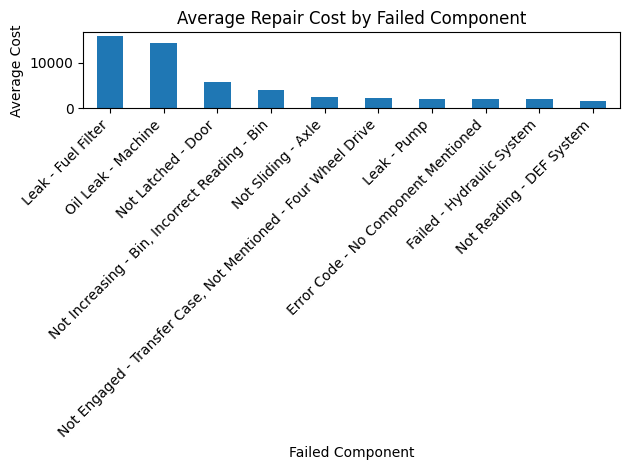

In [260]:
import matplotlib.pyplot as plt

avg_cost_by_failure = (
    df.groupby('Failure Condition - Failure Component')['Cost']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
avg_cost_by_failure.plot(kind='bar')
plt.title('Average Repair Cost by Failed Component')
plt.xlabel('Failed Component')
plt.ylabel('Average Cost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Interpretation**

Failures related to Alternator, Fan, Oil Loss, and Cab Heating show higher average repair costs.

Electrical and mechanical failures tend to incur higher part replacement costs than cosmetic or minor issues.

This insight helps prioritize preventive maintenance for high-cost components.

**Trend 2: Actual Hours vs Failed Component**


/tmp/ipython-input-3939819697.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


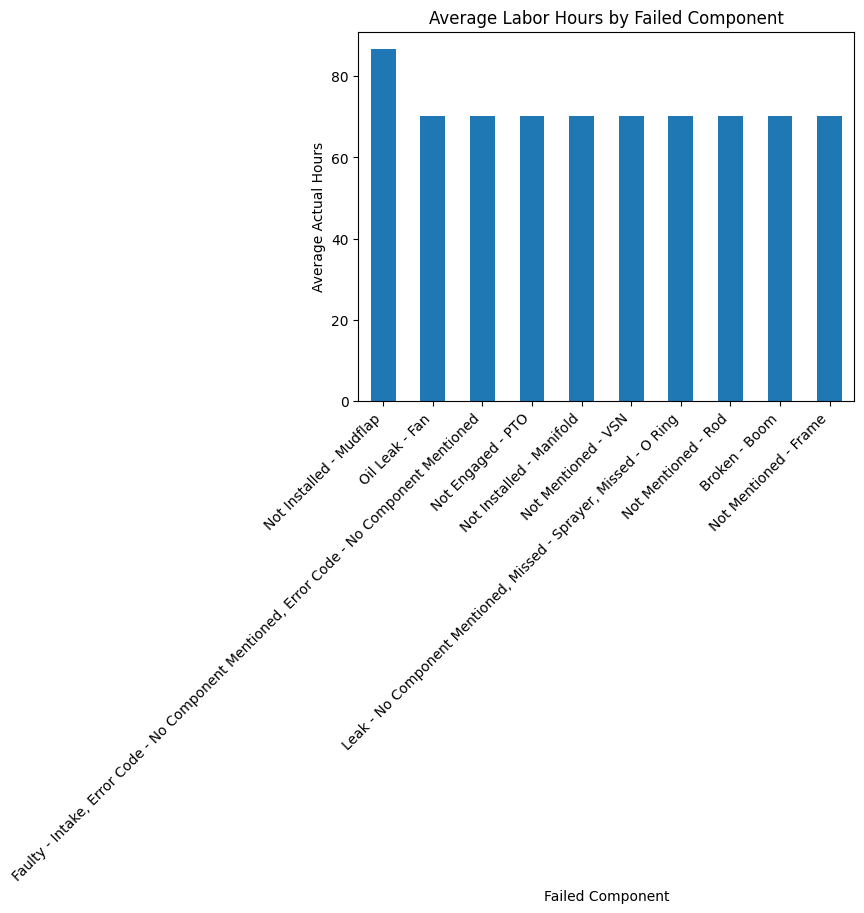

In [261]:
avg_hours_by_failure = (
    df.groupby('Failure Condition - Failure Component')['Actual Hours']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
avg_hours_by_failure.plot(kind='bar')
plt.title('Average Labor Hours by Failed Component')
plt.xlabel('Failed Component')
plt.ylabel('Average Actual Hours')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Interpretation**

Failures involving engine accessories, alternators, and cooling systems require more labor hours.

High labor + high cost failures indicate complex repairs, not just expensive parts.

These components are strong candidates for design or supplier review.

**Trend 3: Cost vs Actual Hours Relationship**

In [ ]:
plt.figure()
plt.scatter(df['Actual Hours'], df['Cost'])
plt.title('Cost vs Actual Hours')
plt.xlabel('Actual Hours')
plt.ylabel('Cost')
plt.tight_layout()
plt.show()


**Interpretation**

A positive relationship exists: higher labor hours generally lead to higher cost.

Outliers indicate:

High cost but low hours → expensive parts

High hours but low cost → labor-intensive diagnostics

Helps distinguish part-driven vs labor-driven expenses.

**Heatmap: Failure Component vs Fix Component Frequency**

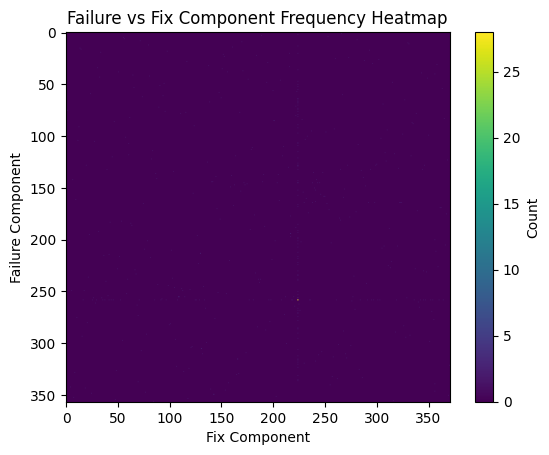

In [262]:
pivot = pd.pivot_table(
    df,
    index='Failure Condition - Failure Component',
    columns='Fix Condition - Fix Component',
    values='Primary Key',
    aggfunc='count'
)

plt.figure()
plt.imshow(pivot.fillna(0))
plt.title('Failure vs Fix Component Frequency Heatmap')
plt.xlabel('Fix Component')
plt.ylabel('Failure Component')
plt.colorbar(label='Count')
plt.show()


**This suggests:**

Failures are symptom-based, not always component-specific

Fixes are often diagnostic or operational, not part replacement

# Root Cause Identification & Stakeholder Insights

In [263]:
df['Failure Condition - Failure Component'].value_counts().head(10)


,count
Failure Condition - Failure Component,
Not Mentioned - Not Mentioned,72
Not Mentioned - Machine,7
Leak - Hose,7
Leak - Steering,7
Leak - Axle,6
Not Mentioned - No Component Mentioned,5
Leak - Boom,5
Not Mentioned - Boom,4
Not Cooling - Air Conditioner,4


**Observations**

1. Dominant Failure Pattern: “Not Mentioned”

2. Leak-Related Failures (Systemic Pattern) are the most frequent.

3.Mechanical System Failures -Low frequency but high safety relevance — requires proactive monitoring.



In [264]:
df['Fix Condition - Fix Component'].value_counts().head(10)


,count
Fix Condition - Fix Component,
No Component Mentioned - No Component Mentioned,109
Valve - Replaced,4
No Component Mentioned - Added,4
O Ring - Replaced,3
No Component Mentioned - Installed,3
Camera - Installed,2
No Component Mentioned - Replaced,2
"Hose - Rerouted, No Component Mentioned - Topped Off",2
Tire - Installed,2


**Observations:**

1️ High Rate of “No Component Mentioned” Fixes

The fix data shows a strong dominance of non-component-based actions.

Meaning:

Issues were resolved through:

Adjustments

Diagnostics

Calibration

Software/configuration changes

In [266]:
integrated_df.to_csv(
    "TASK 2 & 3 -cleaned_merged_dataset.csv",
    index=False
)
